# Exploratory Data Analysis

This is a small exploratory notebook to take a first look at the data and the relations between the features

-----------


First import the needed libraries

In [1]:
import keras, ROOT, sklearn
import flat_helper
import numpy

# from keras_tqdm import TQDMNotebookCallback # uncomment this to get the progress bar
#import theano
#theano.config.gcc.cxxflags = '-march=corei7' 

Using TensorFlow backend.


Welcome to JupyROOT 6.12/06


Then load the data

In [2]:
dfQuarks = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/quarks_standard', 20000, recompute=False)
dfGluons = flat_helper.GetJetShapesFast('/eos/user/c/cbeiraod/DataScienceSchool/Data Challenge/gluons_standard', 20000, recompute=False)

Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_quarks_standard_shapes.root
Loading from root file _eos_user_c_cbeiraod_DataScienceSchool_Data Challenge_gluons_standard_shapes.root


## Exploration

Take a look at the information such as which branches, how many entries and the data type

In [3]:
dfQuarks.info()
#dfGluons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
mass          20000 non-null float32
ntowers       20000 non-null float32
radial        20000 non-null float32
dispersion    20000 non-null float32
dtypes: float32(4)
memory usage: 312.6 KB


Look at the first "nevt" events for quarks and gluons, see some values of the features

In [4]:
nevt=6
dfQuarks.head(nevt)

,mass,ntowers,radial,dispersion
0,12.185929,11.0,0.045043,0.384206
1,5.329337,13.0,0.016920,0.436819
2,6.688938,3.0,0.026399,0.509502
3,8.983985,11.0,0.027306,0.405769
4,24.100706,12.0,0.111171,0.362364
5,6.914141,11.0,0.011104,0.563266


In [5]:
dfGluons.head(nevt)
# As an alternative, we can look at the last "nevt" events
#dfGluons.tail(nevt)
# Or randomly sample:
#dfGluons.sample(nevt)

,mass,ntowers,radial,dispersion
0,14.367233,14.0,0.054968,0.353077
1,10.668119,11.0,0.029878,0.555024
2,12.146415,13.0,0.034733,0.390114
3,8.801844,8.0,0.035857,0.556150
4,14.279649,9.0,0.049742,0.589295
5,17.277428,8.0,0.070760,0.371848


Now we will ask for a description of the datasets, this will give us some statistical information of each feature (mean, min, max, etc)

In [6]:
dfQuarks.describe()

,mass,ntowers,radial,dispersion
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10.143486,8.654600,0.037348,0.539091
std,4.229324,4.368953,0.024821,0.140604
min,1.163194,0.000000,0.000000,0.000000
25%,7.234231,5.000000,0.020514,0.437586
50%,9.240952,8.000000,0.030497,0.517837
75%,12.129803,11.000000,0.047002,0.618226
max,32.184860,35.000000,0.203564,1.000000


In [7]:
dfGluons.describe()

,mass,ntowers,radial,dispersion
count,20000.000000,20000.00000,20000.000000,20000.000000
mean,13.587820,12.49070,0.054437,0.435623
std,4.567275,5.19121,0.028272,0.114319
min,2.256459,0.00000,0.000000,0.000000
25%,10.332701,9.00000,0.034168,0.356576
50%,12.955534,12.00000,0.049180,0.411027
75%,16.264200,16.00000,0.069413,0.486932
max,32.493828,41.00000,0.225824,1.000000


Test some assumptions on the data

In [8]:
dfQuarks.query('mass < 2.5')

,mass,ntowers,radial,dispersion
1268,2.064764,0.0,0.013451,0.672909
1813,2.402731,1.0,0.010976,0.599734
3035,1.171822,3.0,0.005085,0.710806
3153,1.948636,4.0,0.001758,1.000000
3535,2.411657,1.0,0.009278,1.000000
3976,2.497957,2.0,0.013278,0.543195
4316,2.408123,3.0,0.007058,1.000000
4851,2.034097,2.0,0.007983,0.707544
6276,2.267599,3.0,0.006351,0.837729
6717,2.480016,2.0,0.010717,0.624702


In [9]:
dfQuarks.query('radial == dispersion')

,mass,ntowers,radial,dispersion
2676,3.266142,7.0,0.0,0.0
5811,4.718185,8.0,0.0,0.0
7492,3.767240,6.0,0.0,0.0
10164,4.299165,10.0,0.0,0.0
11216,7.178011,5.0,0.0,0.0
13845,5.641160,12.0,0.0,0.0
13941,8.226786,9.0,0.0,0.0
15480,4.030625,9.0,0.0,0.0
15782,4.461095,6.0,0.0,0.0
17902,7.173931,7.0,0.0,0.0


### Visualization

Plot some 1D histograms

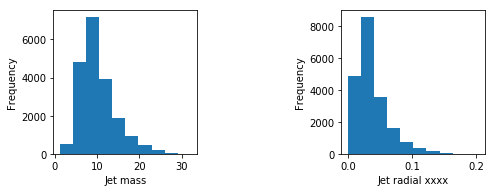

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)

ax[0].hist(dfQuarks.mass, 10, label="Quarks")
ax[1].hist(dfQuarks.radial, 10, label="Quarks")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=1)
ax[0].set_xlabel("Jet mass")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("Jet radial xxxx")
ax[1].set_ylabel("Frequency")

plt.show()

Plot some 2D scatter plots

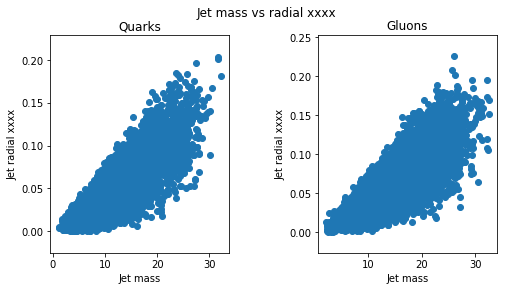

In [11]:
fig, ax = plt.subplots(1,2, figsize=(8,4))

ax[0].scatter(dfQuarks.mass, dfQuarks.radial)
ax[1].scatter(dfGluons.mass, dfGluons.radial)

ax[0].set_title("Quarks")
ax[1].set_title("Gluons")
ax[0].set_xlabel("Jet mass")
ax[1].set_xlabel("Jet mass")
ax[0].set_ylabel("Jet radial xxxx")
ax[1].set_ylabel("Jet radial xxxx")
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Jet mass vs radial xxxx")

plt.show()

Get the correlation matrix

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


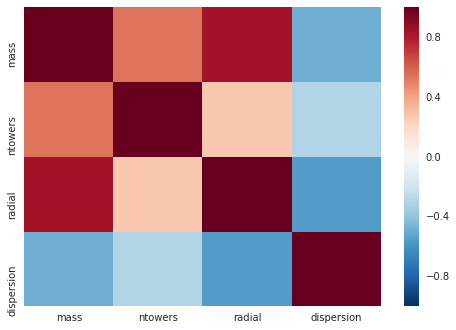

In [12]:
import seaborn as sns

corrQuarks = dfQuarks.corr()
sns.heatmap(corrQuarks,
            xticklabels=corrQuarks.columns.values,
            yticklabels=corrQuarks.columns.values)
sns.plt.show()

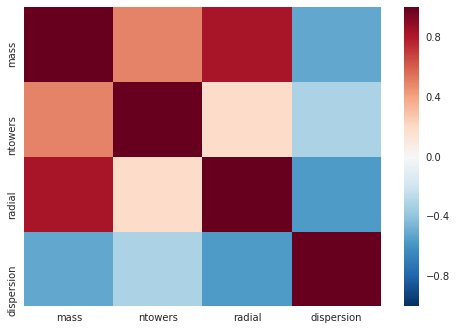

In [13]:
corrGluons = dfGluons.corr()
sns.heatmap(corrGluons,
            xticklabels=corrGluons.columns.values,
            yticklabels=corrGluons.columns.values)
sns.plt.show()